Name : Avnish Kshirsagar

Model : Titanic Survival Prediction

In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression

In [9]:
df = pd.read_csv('/tested.csv')
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,0,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,0,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,0,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


In [11]:
df.shape

(418, 12)

In [12]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

In [13]:
df = df.drop('Cabin', axis=1)

In [14]:
df.dropna(inplace=True)

In [15]:
df.shape

(331, 11)

In [16]:
df.nunique()

PassengerId    331
Survived         2
Pclass           3
Name           331
Sex              2
Age             78
SibSp            7
Parch            7
Ticket         284
Fare           148
Embarked         3
dtype: int64

In [17]:
df['Survived'].value_counts()

0    204
1    127
Name: Survived, dtype: int64

In [19]:
df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,1100.232628,0.383686,2.141994,30.181269,0.483384,0.398792,40.982087
std,122.910180,0.487019,0.846251,14.104573,0.875004,0.811582,61.228558
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,992.500000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000
50%,1100.000000,0.000000,2.000000,27.000000,0.000000,0.000000,16.000000
75%,1210.500000,1.000000,3.000000,39.000000,1.000000,1.000000,40.633350
max,1307.000000,1.000000,3.000000,76.000000,8.000000,6.000000,512.329200


<Axes: >

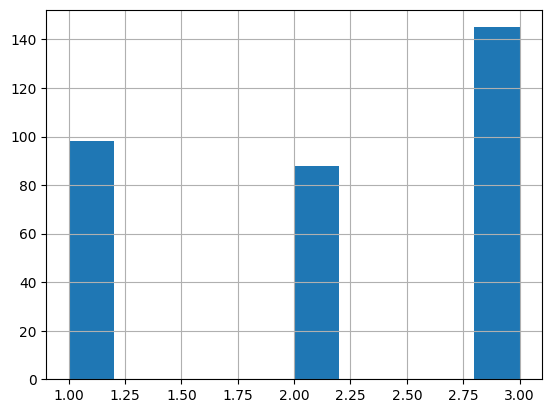

In [20]:
df['Pclass'].hist()

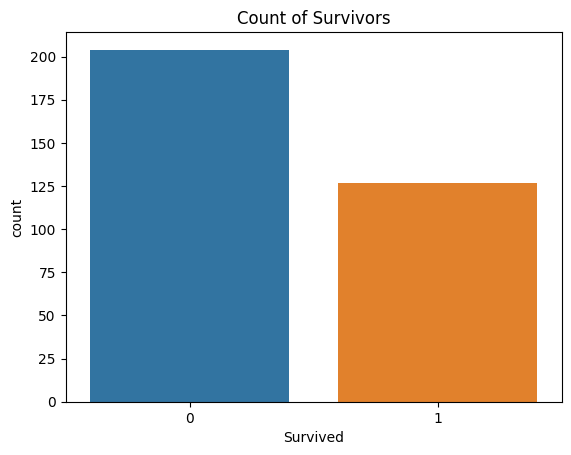

In [22]:
sns.countplot(x='Survived', data=df)
plt.title('Count of Survivors')
plt.show()

<Axes: xlabel='Survived', ylabel='count'>

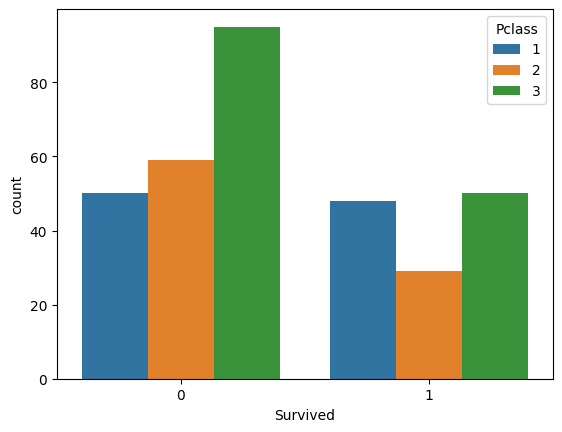

In [23]:
sns.countplot(x=df['Survived'], hue=df['Pclass'])

<Axes: xlabel='Sex', ylabel='count'>

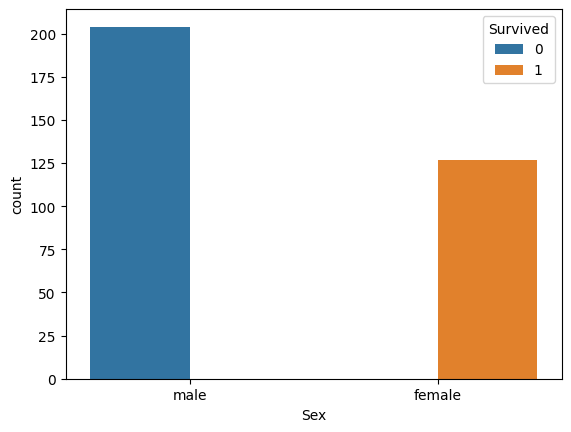

In [24]:
sns.countplot(x=df['Sex'], hue=df['Survived'])

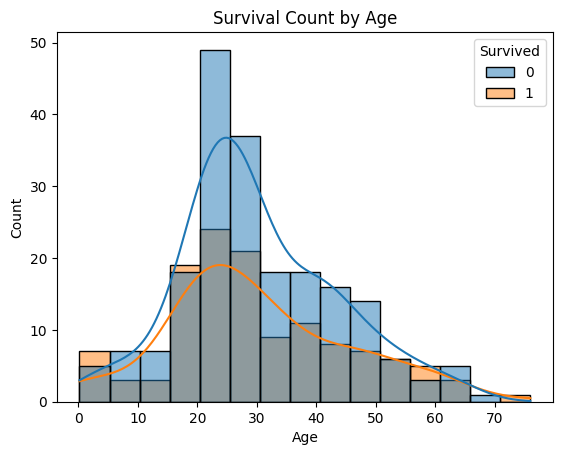

In [26]:
sns.histplot(x='Age', hue='Survived', data=df, kde=True)
plt.title('Survival Count by Age')
plt.show()

In [28]:
labelencoder = LabelEncoder()
df['Sex']= labelencoder.fit_transform(df['Sex'])

In [29]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,0,3,"Kelly, Mr. James",1,34.5,0,0,330911,7.8292,Q
1,893,1,3,"Wilkes, Mrs. James (Ellen Needs)",0,47.0,1,0,363272,7.0000,S
2,894,0,2,"Myles, Mr. Thomas Francis",1,62.0,0,0,240276,9.6875,Q
3,895,0,3,"Wirz, Mr. Albert",1,27.0,0,0,315154,8.6625,S
4,896,1,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",0,22.0,1,1,3101298,12.2875,S


In [30]:
df['Sex'], df['Survived']

(0      1
 1      0
 2      1
 3      1
 4      0
       ..
 409    0
 411    0
 412    0
 414    0
 415    1
 Name: Sex, Length: 331, dtype: int64,
 0      0
 1      1
 2      0
 3      0
 4      1
       ..
 409    1
 411    1
 412    1
 414    1
 415    0
 Name: Survived, Length: 331, dtype: int64)

In [31]:
df2 = df

In [33]:
X= df2[['Pclass', 'Sex', 'Age']]
Y=df2['Survived']
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size = 0.25, random_state = 0)
model = LogisticRegression()
model.fit(X_train, Y_train)

LogisticRegression()

In [34]:
pred = print(model.predict(X_test))

[0 1 0 1 1 1 1 0 0 1 0 0 0 1 1 1 0 1 0 0 1 0 0 0 0 0 1 1 0 1 0 1 1 1 0 0 1
 1 0 1 1 0 1 0 1 0 0 1 0 0 1 0 1 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0
 0 0 0 0 1 0 0 0 1]


In [35]:
print(Y_test)

71     0
90     1
166    0
74     1
66     1
      ..
350    1
369    0
5      0
38     0
291    1
Name: Survived, Length: 83, dtype: int64


In [50]:
import warnings
warnings.filterwarnings("ignore")

res= model.predict([[1,1,15]])

if(res==0):
  print("So Sorry! Not Survived")
else:
  print("Survived")

So Sorry! Not Survived
